In [134]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer


In [135]:
# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/CSV files/Bank_data.csv")

# Initial exploration
print(df.info())
print(df.describe())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [136]:
numerical_cols = ['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed']
df[numerical_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41188.0,258.285010,259.279249,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,41188.0,962.475454,186.910907,0.000,999.000,999.000,999.000,999.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp_var_rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons_price_idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons_conf_idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr_employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [137]:
categorical_columns = df.select_dtypes(include=['object']).columns
df[categorical_columns].describe().T

,count,unique,top,freq
job,41188,12,admin.,10422
marital,41188,4,married,24928
education,41188,8,university.degree,12168
default,41188,3,no,32588
housing,41188,3,yes,21576
loan,41188,3,no,33950
contact,41188,2,cellular,26144
month,41188,10,may,13769
day_of_week,41188,5,thu,8623
poutcome,41188,3,nonexistent,35563


In [138]:
# Print unique values for each categorical column
for column in categorical_columns:
    unique_values = df[column].unique()
    print(f"{column}: {unique_values}\n")


job: ['blue-collar' 'technician' 'management' 'services' 'retired' 'admin.'
 'housemaid' 'unemployed' 'entrepreneur' 'self-employed' 'unknown'
 'student']

marital: ['married' 'single' 'divorced' 'unknown']

education: ['basic.4y' 'unknown' 'university.degree' 'high.school' 'basic.9y'
 'professional.course' 'basic.6y' 'illiterate']

default: ['unknown' 'no' 'yes']

housing: ['yes' 'no' 'unknown']

loan: ['no' 'yes' 'unknown']

contact: ['cellular' 'telephone']

month: ['aug' 'nov' 'jun' 'apr' 'jul' 'may' 'oct' 'mar' 'sep' 'dec']

day_of_week: ['thu' 'fri' 'tue' 'mon' 'wed']

poutcome: ['nonexistent' 'success' 'failure']



In [139]:
def replace_education(education):
    """
    This function codes the highest education attained.
    """
    if education == 'university.degree':
        return 8
    elif education == 'professional.course':
        return 7
    elif education == 'high.school':
        return 6
    elif education == 'basic.9y':
        return 5
    elif education == 'basic.6y':
        return 4
    elif education =='basic.4y':
        return 3
    elif education == 'unknown':
        return 2
    elif education == 'illiterate':
        return 1

def replace_job(job):
    """
    This function codes the highest job earned.
    """
    if job == 'management':
        return 12
    elif job == 'admin.':
        return 11
    elif job == 'entrepreneur':
        return 10
    elif job == 'technician':
        return 9
    elif job == 'services':
        return 8
    elif job == 'self-employed':
        return 7
    elif job == 'blue-collar':
        return 6
    elif job == 'retired':
        return 5
    elif job == 'housemaid':
        return 4
    elif job == 'unemployed':
        return 3
    elif job == 'unknown':
        return 2
    elif job == 'student':
        return 1

def replace_marital(marital):
    if marital == 'married':
        return 4
    elif marital == 'single':
        return 3
    elif marital == 'divorced':
        return 2
    elif marital == 'unknown':
        return 1

def replace_default(default):
    if default == 'no':
        return 0
    elif default == 'yes':
        return 1
    elif default == 'unknown':
        return 2

def replace_housing(housing):
    if housing == 'no':
        return 0
    elif housing == 'yes':
        return 1
    elif housing == 'unknown':
        return 2

def replace_loan(loan):
    if loan == 'no':
        return 0
    elif loan == 'yes':
        return 1
    elif loan == 'unknown':
        return 2

def replace_contact(contact):
    if contact == 'cellular':
        return 1
    elif contact == 'telephone':
        return 2

def replace_poutcome(poutcome):
    if poutcome == 'failure':
        return 0
    elif poutcome == 'success':
        return 1
    elif poutcome == 'nonexistent':
        return 2

df['education'] = df['education'].apply(lambda x: replace_education(x))
df['job'] = df['job'].apply(lambda x: replace_job(x))
df['marital'] = df['marital'].apply(lambda x: replace_marital(x))
df['default'] = df['default'].apply(lambda x: replace_default(x))
df['housing'] = df['housing'].apply(lambda x: replace_housing(x))
df['loan'] = df['loan'].apply(lambda x: replace_loan(x))
df['contact'] = df['contact'].apply(lambda x: replace_contact(x))
df['poutcome'] = df['poutcome'].apply(lambda x: replace_poutcome(x))

In [140]:
look_up = {'aug': 8, 'nov': 11, 'jun': 6, 'apr': 4, 'jul': 7,
            'may': 5, 'oct': 10, 'mar': 3, 'sep': 9, 'dec': 12}

df['month'] = df['month'].apply(lambda x: look_up[x])
look_up = {'thu': 4, 'fri': 5, 'tue': 2, 'mon': 1, 'wed': 3}

df['day_of_week'] = df['day_of_week'].apply(lambda x: look_up[x])

In [141]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,6,4,3,2,1,0,1,8,4,...,1,999,0,2,1.4,93.444,-36.1,4.963,5228.1,0
1,53,9,4,2,0,0,0,1,11,5,...,1,999,0,2,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,12,3,8,0,1,0,1,6,4,...,3,6,2,1,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,8,4,6,0,0,0,1,4,5,...,2,999,0,2,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,5,4,3,0,1,0,1,8,5,...,1,3,1,1,-2.9,92.201,-31.4,0.869,5076.2,1


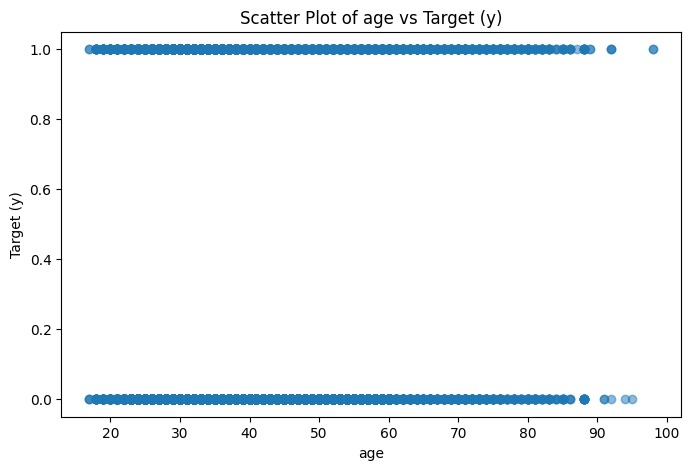

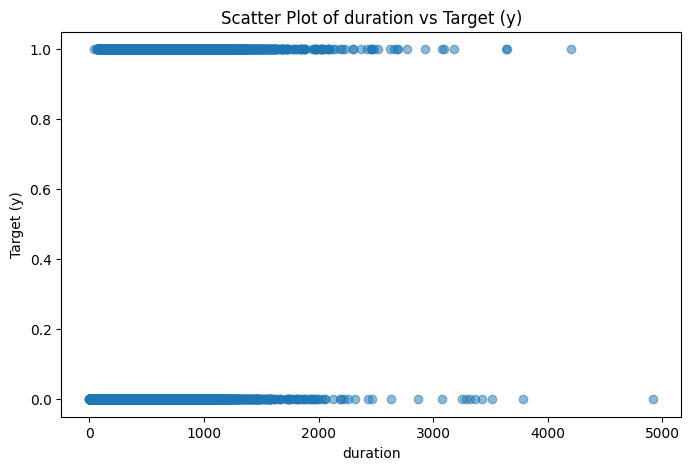

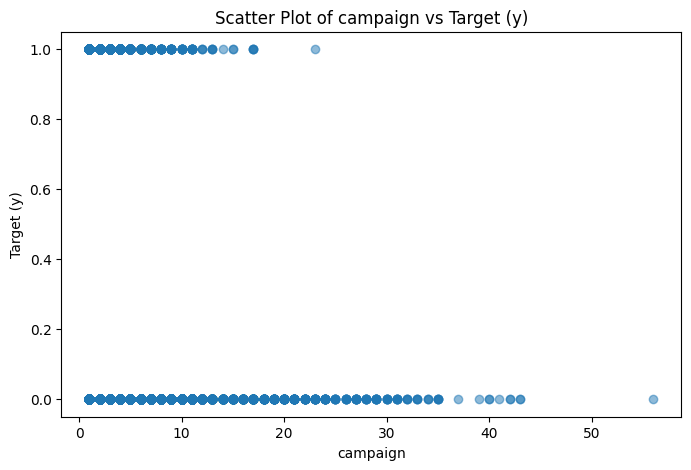

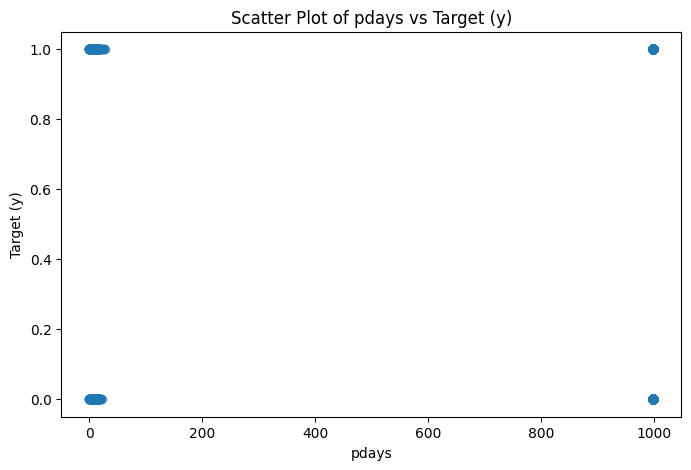

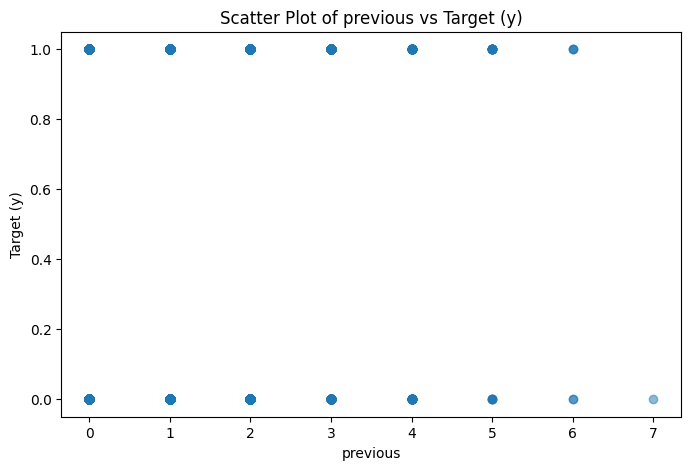

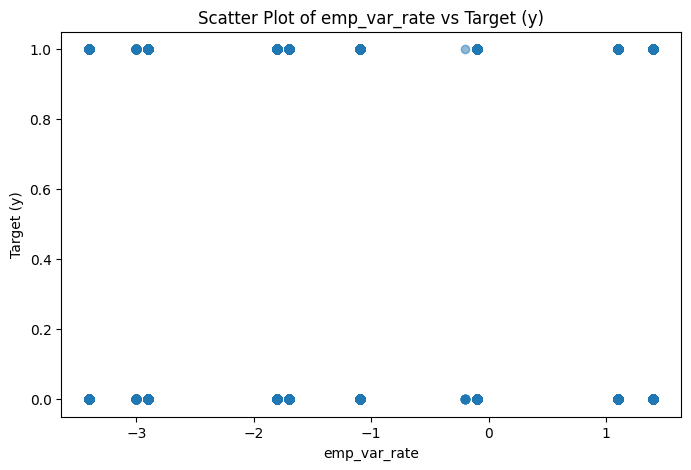

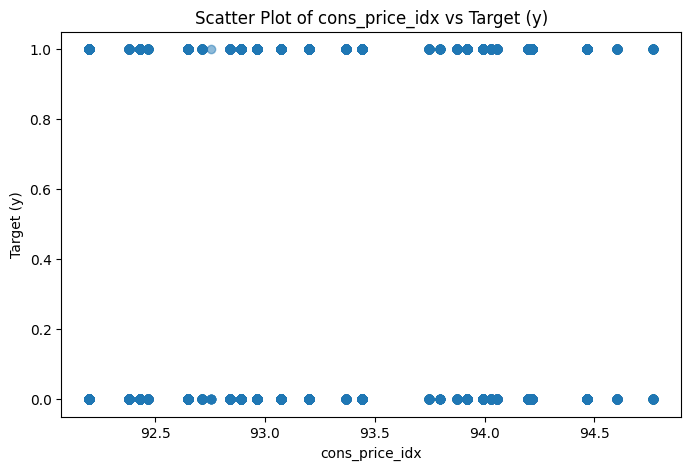

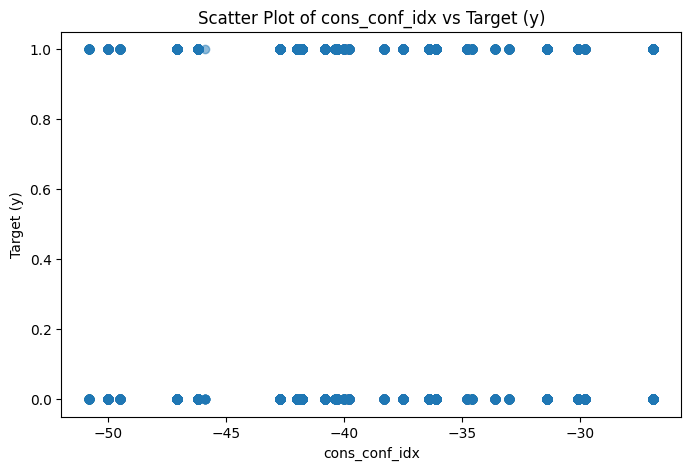

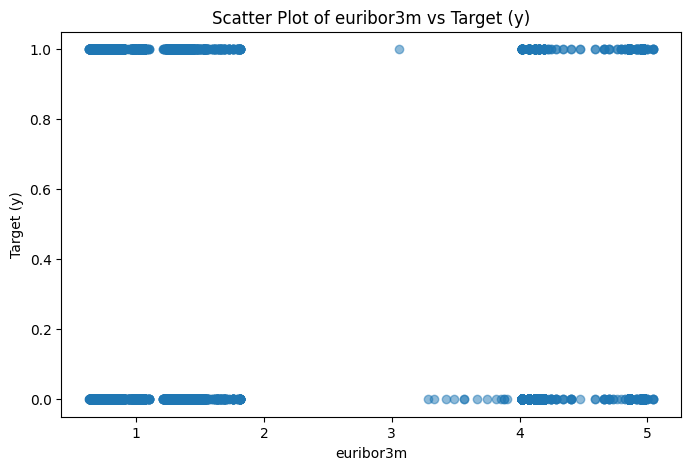

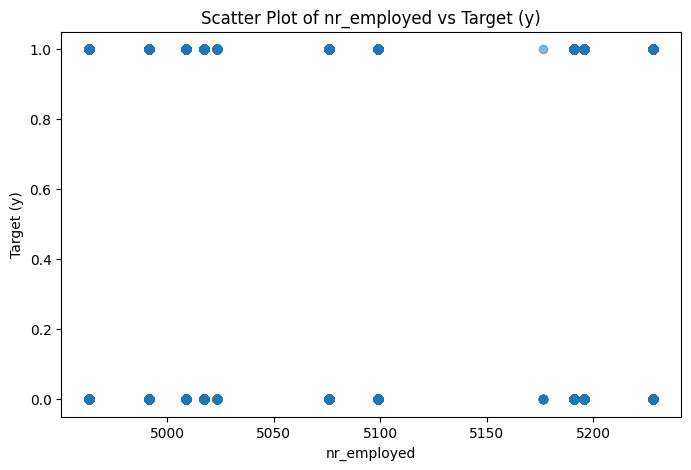

In [142]:
# Scatter plot each numeric column against the target
for column in numerical_cols:
    plt.figure(figsize=(8, 5))
    plt.scatter(df[column], df['y'], alpha=0.5)
    plt.xlabel(column)
    plt.ylabel('Target (y)')
    plt.title(f'Scatter Plot of {column} vs Target (y)')
    plt.show()


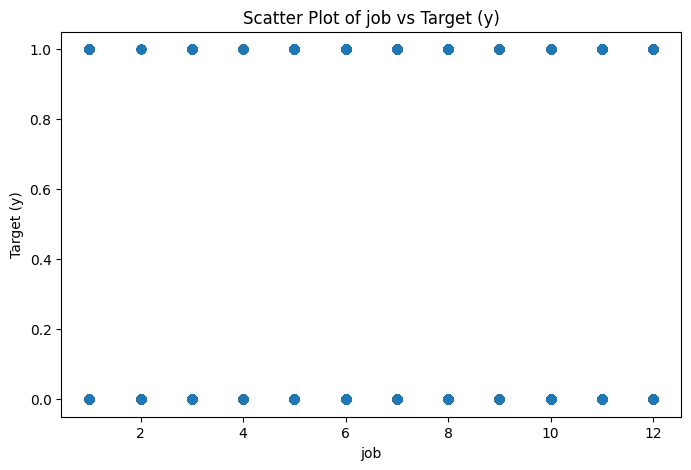

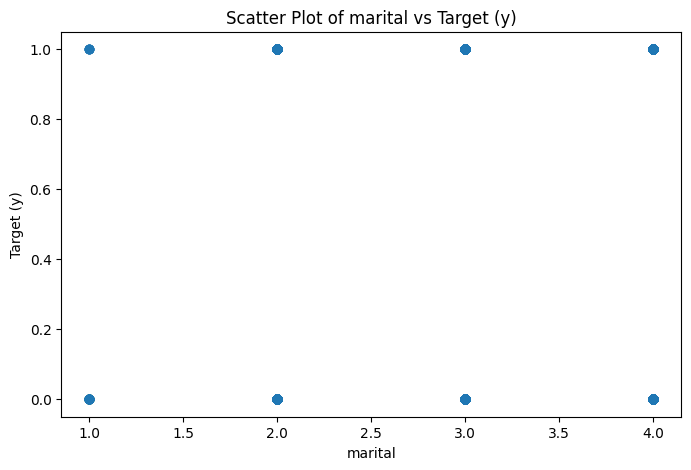

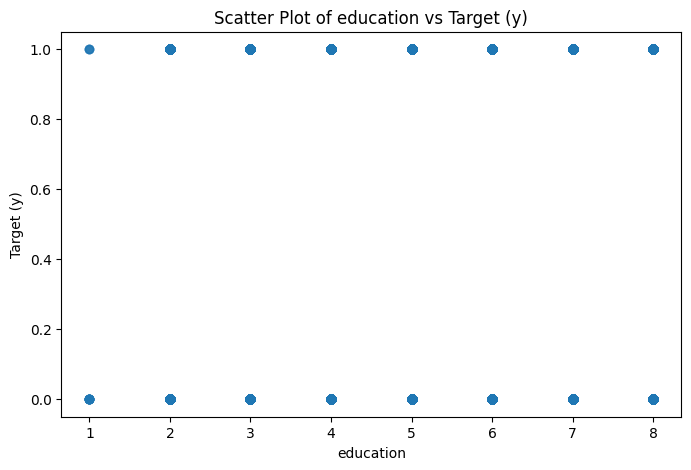

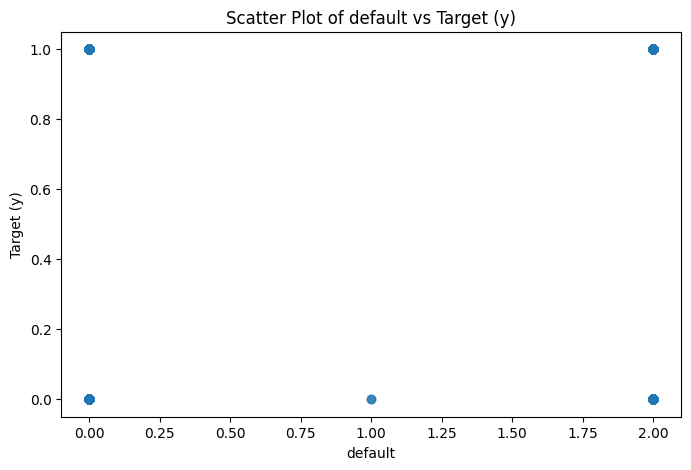

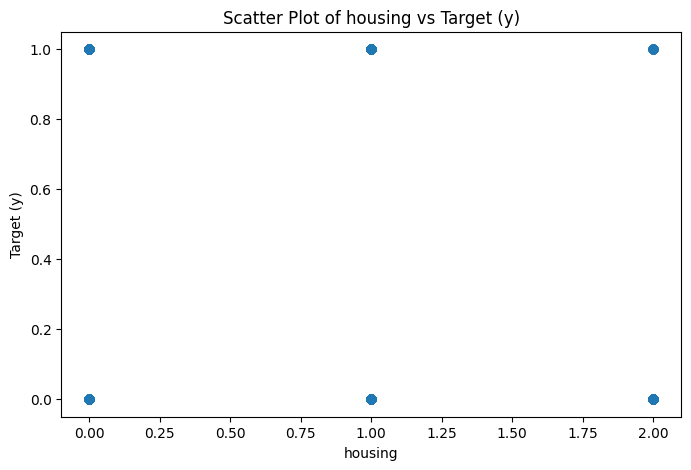

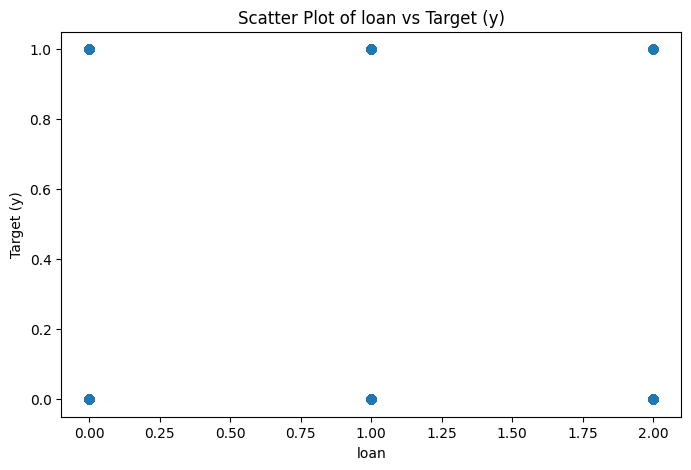

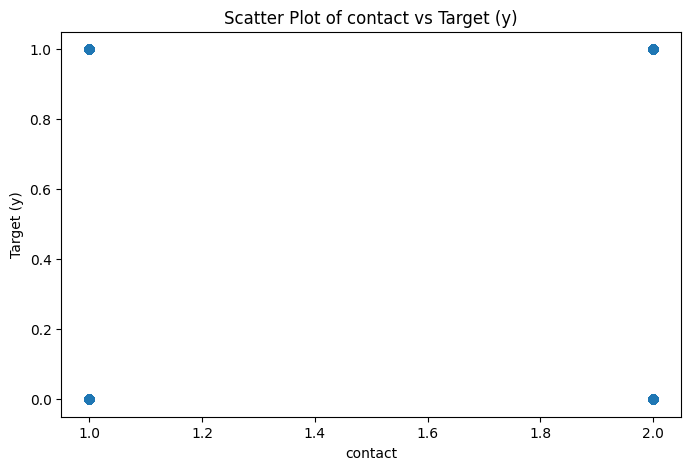

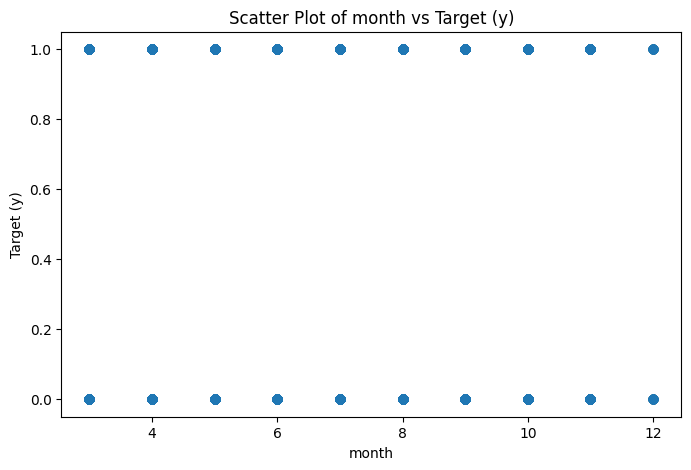

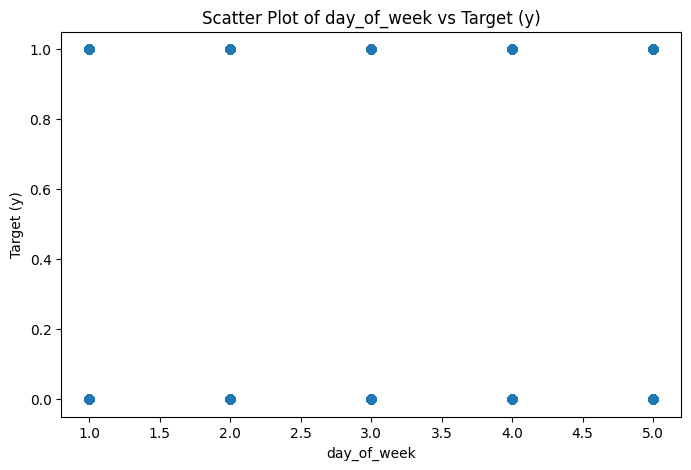

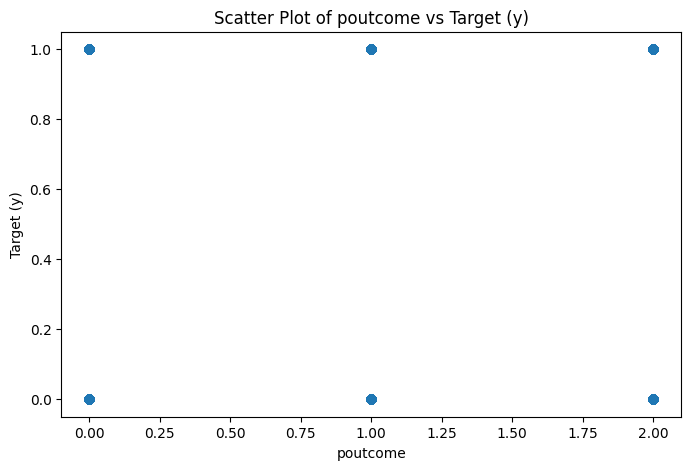

In [143]:
# Scatter plot each numeric column against the target
for column in categorical_columns:
    plt.figure(figsize=(8, 5))
    plt.scatter(df[column], df['y'], alpha=0.5)
    plt.xlabel(column)
    plt.ylabel('Target (y)')
    plt.title(f'Scatter Plot of {column} vs Target (y)')
    plt.show()

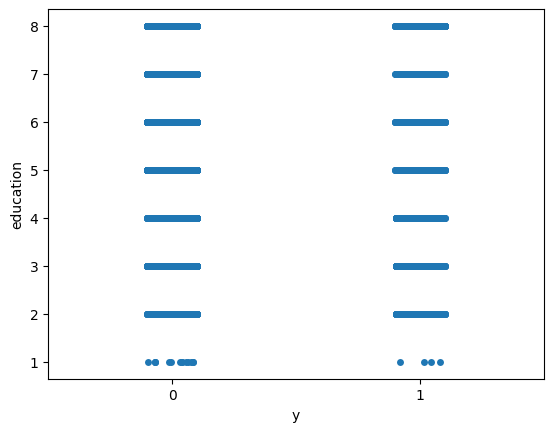

In [144]:
sns.stripplot(x="y", y="education", data=df, jitter=True)
plt.show()


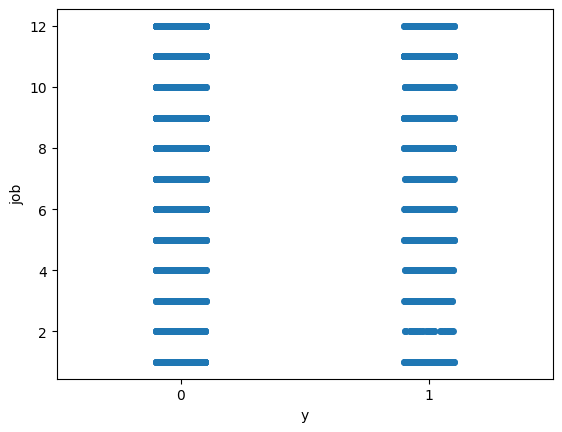

In [145]:
sns.stripplot(x="y", y="job", data=df, jitter=True)
plt.show()

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  int64  
 2   marital         41188 non-null  int64  
 3   education       41188 non-null  int64  
 4   default         41188 non-null  int64  
 5   housing         41188 non-null  int64  
 6   loan            41188 non-null  int64  
 7   contact         41188 non-null  int64  
 8   month           41188 non-null  int64  
 9   day_of_week     41188 non-null  int64  
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  int64  
 15  emp_var_rate    41188 non-null  float64
 16  cons_price_idx  41188 non-null  float64
 17  cons_conf_idx   41188 non-null 

In [147]:
outcome = df['y']
data = df[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp_var_rate','cons_price_idx','cons_conf_idx','nr_employed','euribor3m']]
data['outcome'] = outcome
data.corr()['outcome'].sort_values(ascending=False)

,outcome
outcome,1.000000
duration,0.405274
previous,0.230181
cons_conf_idx,0.054878
month,0.037187
education,0.035848
age,0.030399
day_of_week,0.010051
housing,0.009552
loan,-0.005038


##Logistic Regression with one independent variable

We are going to begin with the simplest possible logistic model, using just one independent variable or feature, the duration.

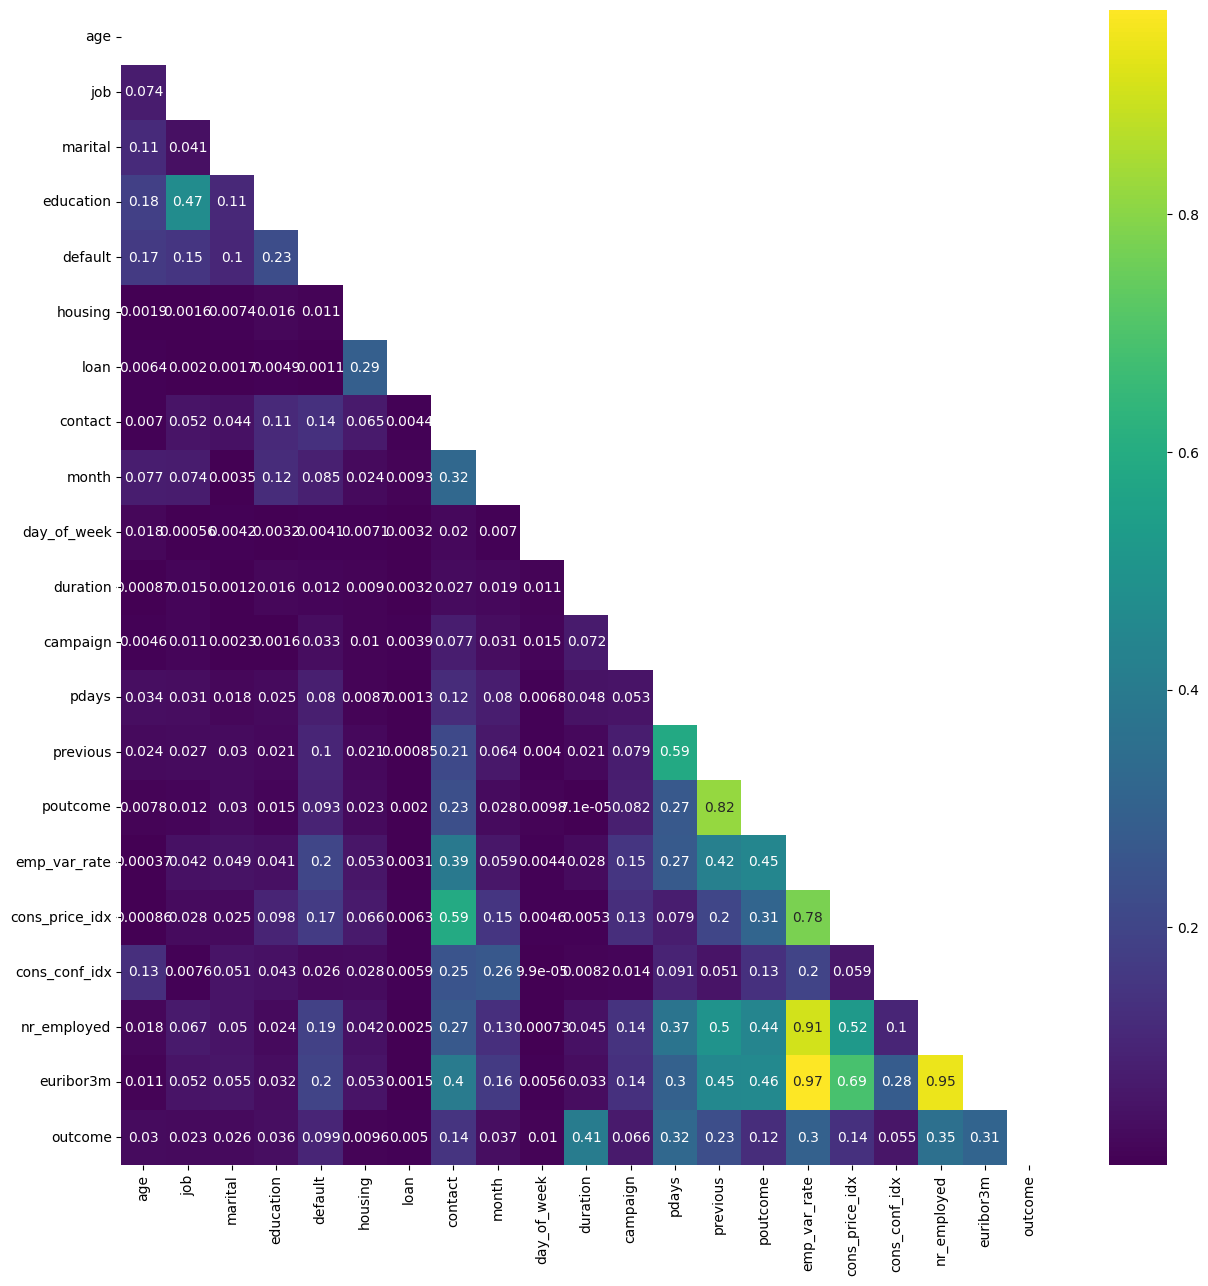

In [148]:
plt.figure(figsize=(15, 15))
corr = data.corr()
mask = np.tri(*corr.shape).T
sns.heatmap(corr.abs(), mask=mask, annot=True, cmap='viridis');

'poutcome' & 'previous' have a high correlation, we can simply remove one of them, So it is better to remove one of the feature.

There are not many strong correlations with the outcome variable. The highest positive correlation is 0.46.

In [149]:
data=data[['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'poutcome', 'cons_conf_idx','euribor3m','outcome']]

In [150]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,poutcome,cons_conf_idx,euribor3m,outcome
0,44,6,4,3,2,1,0,1,8,4,210,1,999,2,-36.1,4.963,0
1,53,9,4,2,0,0,0,1,11,5,138,1,999,2,-42.0,4.021,0
2,28,12,3,8,0,1,0,1,6,4,339,3,6,1,-39.8,0.729,1
3,39,8,4,6,0,0,0,1,4,5,185,2,999,2,-47.1,1.405,0
4,55,5,4,3,0,1,0,1,8,5,137,1,3,1,-31.4,0.869,1


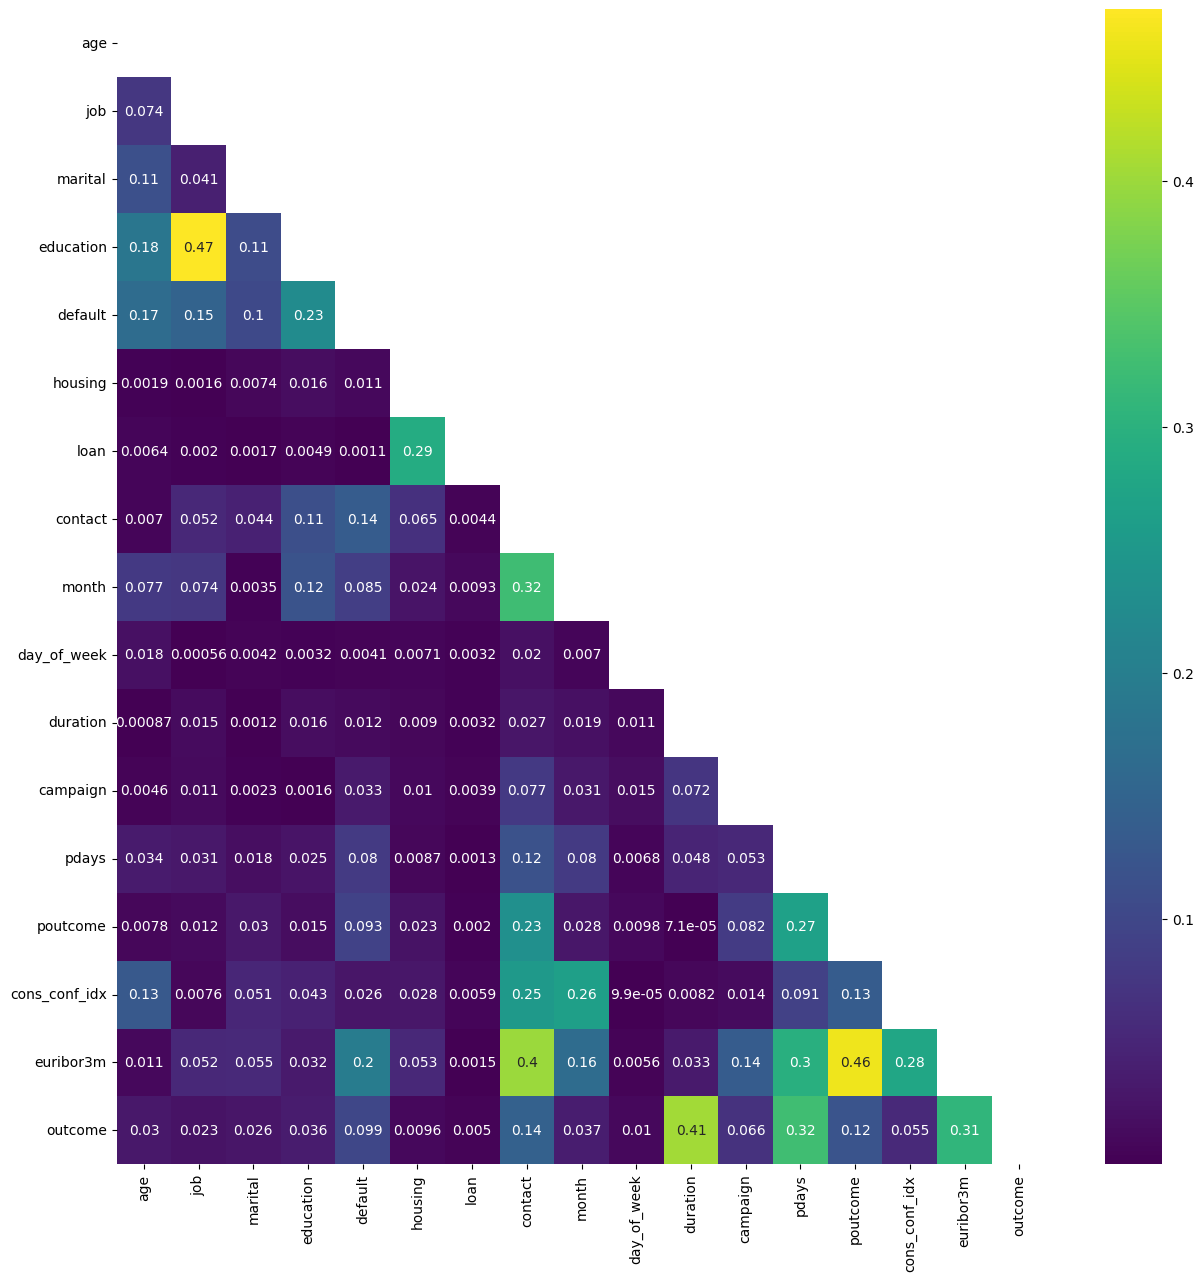

In [151]:
plt.figure(figsize=(15, 15))
corr = data.corr()
mask = np.tri(*corr.shape).T
sns.heatmap(corr.abs(), mask=mask, annot=True, cmap='viridis');

## Model_2
## Adding all variables

In [152]:
cols = data.drop(columns=['outcome']).columns
X = data[cols]
X = sm.add_constant(X)
y = data['outcome']

In [153]:
import statsmodels.api as sm
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.220807
         Iterations 8
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: outcome          Pseudo R-squared: 0.373     
Date:               2024-11-12 22:39 AIC:              18223.2157
No. Observations:   41188            BIC:              18369.8560
Df Model:           16               Log-Likelihood:   -9094.6   
Df Residuals:       41171            LL-Null:          -14499.   
Converged:          1.0000           LLR p-value:      0.0000    
No. Iterations:     8.0000           Scale:            1.0000    
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const             1.6066   0.2907   5.5266 0.0000  1.0369  2.1764
age               0.0066   0.0017   3.9380 0.0001  0.0033  0.0100


##Removing day_of_weak for model 2

In [156]:
cols = X.drop(columns=['day_of_week']).columns
# Include 'const' column in data if it doesn't exist
if 'const' not in data.columns:
    data['const'] = 1  # Add a constant column to data

X = data[cols] # Now data contains 'const' and this line should work
y = data['outcome']

In [157]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.220809
         Iterations 8
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: outcome          Pseudo R-squared: 0.373     
Date:               2024-11-12 22:43 AIC:              18221.3811
No. Observations:   41188            BIC:              18359.3955
Df Model:           15               Log-Likelihood:   -9094.7   
Df Residuals:       41172            LL-Null:          -14499.   
Converged:          1.0000           LLR p-value:      0.0000    
No. Iterations:     8.0000           Scale:            1.0000    
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const             1.6241   0.2876   5.6478 0.0000  1.0605  2.1877
age               0.0066   0.0017   3.9331 0.0001  0.0033  0.0099


## Model 3 Removing Housing

In [158]:
cols = X.drop(columns=['loan','housing']).columns
# Include 'const' column in data if it doesn't exist
if 'const' not in data.columns:
    data['const'] = 1  # Add a constant column to data

X = data[cols] # Now data contains 'const' and this line should work
y = data['outcome']

In [159]:
logit_model=sm.Logit(y,X)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.220828
         Iterations 8
                         Results: Logit
Model:              Logit            Method:           MLE       
Dependent Variable: outcome          Pseudo R-squared: 0.373     
Date:               2024-11-12 22:45 AIC:              18218.8872
No. Observations:   41188            BIC:              18339.6499
Df Model:           13               Log-Likelihood:   -9095.4   
Df Residuals:       41174            LL-Null:          -14499.   
Converged:          1.0000           LLR p-value:      0.0000    
No. Iterations:     8.0000           Scale:            1.0000    
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
const             1.6133   0.2870   5.6215 0.0000  1.0508  2.1758
age               0.0067   0.0017   3.9418 0.0001  0.0033  0.0100


In [160]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# FOR Train Data

In [161]:
y_train_pred = logreg.predict_proba(X_train)[:, 1]
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train, y_train)))

Accuracy of logistic regression classifier on train set: 0.91


In [162]:
y_train_pred_df = pd.DataFrame(y_train_pred) # Convert to DataFrame
print(y_train_pred_df.head(100))

           0
0   0.049905
1   0.029679
2   0.013689
3   0.025438
4   0.126878
..       ...
95  0.124919
96  0.036168
97  0.014157
98  0.902794
99  0.010189

[100 rows x 1 columns]


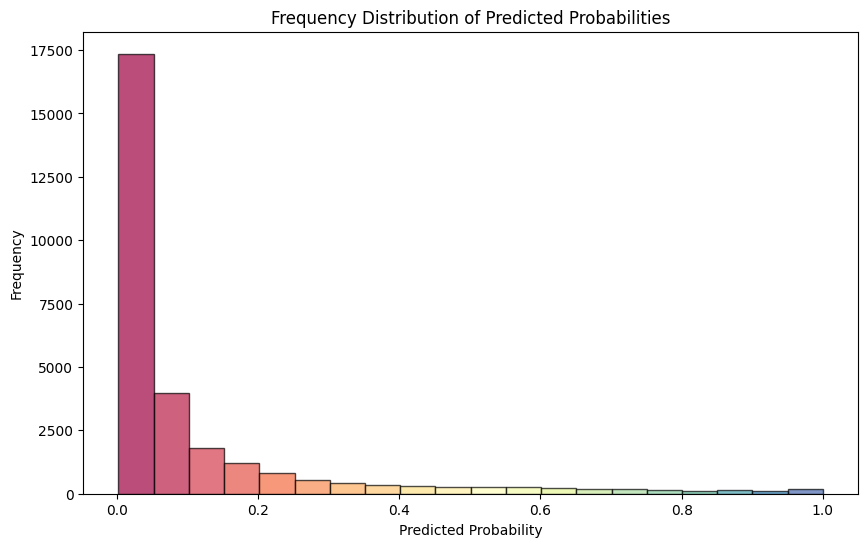

In [177]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'y_train_pred_df' is a DataFrame containing 'predicted_probability'
probabilities = y_train_pred_df

plt.figure(figsize=(10, 6))

# Define the number of bins
num_bins = 20

# Create the histogram
n, bins, patches = plt.hist(probabilities, bins=num_bins, edgecolor='black', alpha=0.7)

# Normalize bin values to [0, 1] for colormap
bin_colors = (bins - bins.min()) / (bins.max() - bins.min())

# Apply the 'Spectral' colormap for a smooth color gradient
for color, patch in zip(bin_colors, patches):
    plt.setp(patch, 'facecolor', plt.cm.Spectral(color))

# Adding labels and title
plt.title('Frequency Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')

# Show plot
plt.show()

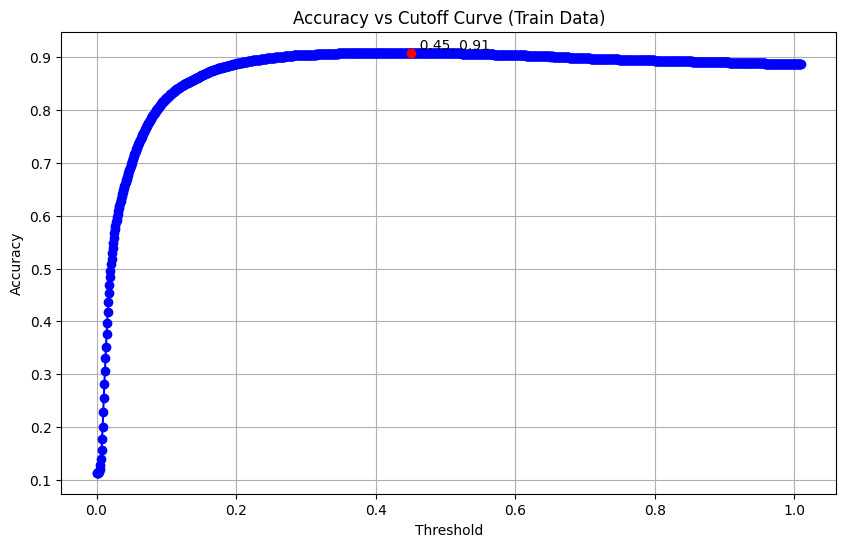

Optimal Cutoff Threshold: 0.45
Maximum Accuracy: 0.91


In [165]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Assuming 'predicted_probability' contains the predicted probabilities of the positive class (1)
# Define the threshold range (from 0 to 1 with a step of 0.01)
thresholds = np.arange(0, 1.01, 0.0008)

# Initialize an empty list to store accuracy for each threshold
accuracies = []

# Loop through each threshold and calculate accuracy
for threshold in thresholds:
    # Classify as 1 if probability >= threshold, else 0
    predictions = (y_train_pred_df >= threshold).astype(int)

    # Calculate accuracy
    accuracy = accuracy_score(y_train, predictions)
    accuracies.append(accuracy)

# Find the optimal threshold (the threshold with the maximum accuracy)
optimal_threshold = thresholds[np.argmax(accuracies)]
max_accuracy = max(accuracies)

# Plotting the Accuracy vs Cutoff curve
plt.figure(figsize=(10, 6))
plt.plot(thresholds, accuracies, color='blue', marker='o')

# Highlight the optimal threshold
plt.scatter(optimal_threshold, max_accuracy, color='red', zorder=5)
plt.text(optimal_threshold, max_accuracy, f'  {optimal_threshold:.2f}, {max_accuracy:.2f}',
         horizontalalignment='left', verticalalignment='bottom')

# Adding labels and title
plt.title('Accuracy vs Cutoff Curve (Train Data)')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.grid(True)

# Show the plot
plt.show()

# Print the optimal cutoff value
print(f"Optimal Cutoff Threshold: {optimal_threshold:.2f}")
print(f"Maximum Accuracy: {max_accuracy:.2f}")

In [166]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = (y_train_pred_df >= 0.45).astype(int)
# Calculate metrics
precision = precision_score(y_train, y_pred)
recall = recall_score(y_train, y_pred)
f1 = f1_score(y_train, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.6473067915690867
Recall: 0.42340686274509803
F1 Score: 0.5119466567882941


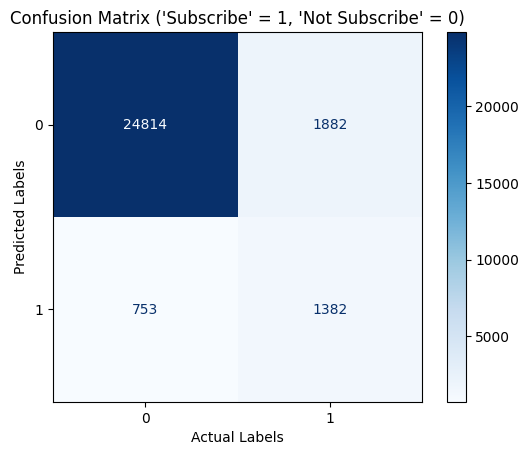

In [167]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Example data
# Replace these with your actual predictions and true labels

y_pred = (y_train_pred_df >= 0.45).astype(int)
# Generate the confusion matrix
cm = confusion_matrix(y_train, y_pred).T

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.title("Confusion Matrix ('Subscribe' = 1, 'Not Subscribe' = 0)")
plt.show()


In [169]:
# Confusion matrix values
TN, FP, FN, TP = 24814, 753, 1882, 1382

# Calculate Accuracy
accuracy = (TN + TP) / (TN + FP + FN + TP)

# Calculate Recall (Sensitivity)
recall = TP / (TP + FN)

# Calculate Specificity
specificity = TN / (TN + FP)

# Calculate Precision
precision = TP / (TP + FP)

# Calculate F1 Score
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1_score:.4f}")


Accuracy: 0.9086
Recall (Sensitivity): 0.4234
Specificity: 0.9705
Precision: 0.6473
F1 Score: 0.5119


# FOR Test Data

In [170]:
y_test_pred = logreg.predict_proba(X_test)[:, 1]
print('Accuracy of logistic regression classifier on train set: {:.2f}'.format(logreg.score(X_train, y_train)))

Accuracy of logistic regression classifier on train set: 0.91


In [171]:
y_test_pred_df = pd.DataFrame(y_test_pred) # Convert to DataFrame
print(y_test_pred_df.head(100))

           0
0   0.061451
1   0.285993
2   0.010213
3   0.008118
4   0.045365
..       ...
95  0.043102
96  0.006669
97  0.066268
98  0.036579
99  0.356502

[100 rows x 1 columns]


In [174]:
from sklearn.metrics import precision_score, recall_score, f1_score

y_pred = (y_test_pred_df >= 0.45).astype(int)
# Calculate metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


Precision: 0.6576879910213244
Recall: 0.4258720930232558
F1 Score: 0.5169827966475519


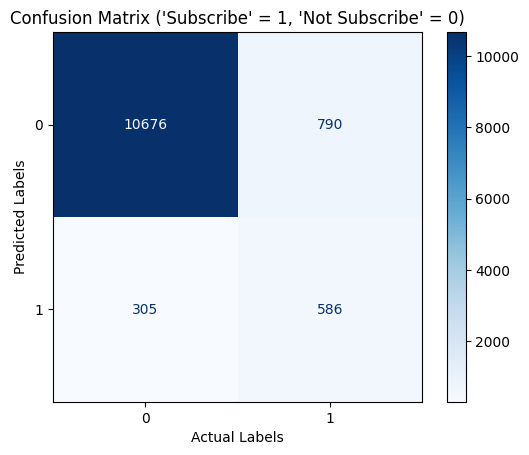

In [175]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Example data
# Replace these with your actual predictions and true labels

y_pred = (y_test_pred_df >= 0.45).astype(int)
# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred).T

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.xlabel("Actual Labels")
plt.ylabel("Predicted Labels")
plt.title("Confusion Matrix ('Subscribe' = 1, 'Not Subscribe' = 0)")
plt.show()

In [176]:
# Confusion matrix values
TN, FP, FN, TP = 10676, 305, 790, 586

# Calculate Accuracy
accuracy = (TN + TP) / (TN + FP + FN + TP)

# Calculate Recall (Sensitivity)
recall = TP / (TP + FN)

# Calculate Specificity
specificity = TN / (TN + FP)

# Calculate Precision
precision = TP / (TP + FP)

# Calculate F1 Score
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Accuracy: {accuracy:.4f}")
print(f"Recall (Sensitivity): {recall:.4f}")
print(f"Specificity: {specificity:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1_score:.4f}")

Accuracy: 0.9114
Recall (Sensitivity): 0.4259
Specificity: 0.9722
Precision: 0.6577
F1 Score: 0.5170


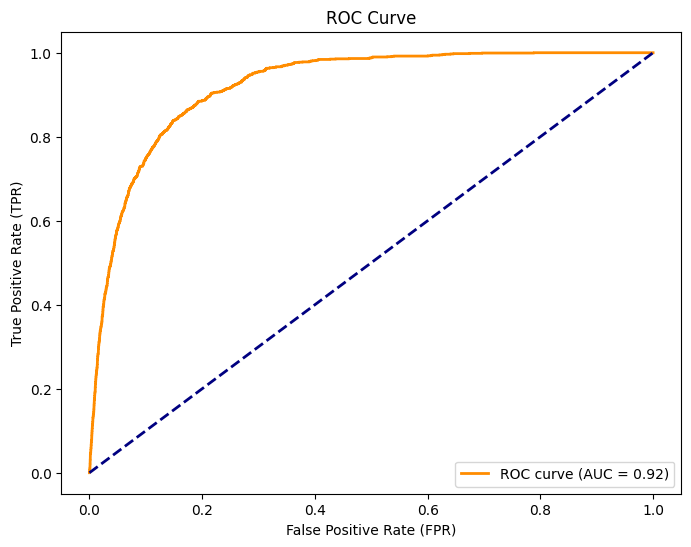

In [178]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
# Predict probabilities using the Logit model on test data
# Predict the probabilities for class 1 using test data

# Compute the ROC curve using the test data
fpr, tpr, thresholds = roc_curve(y_test, y_test_pred_df)  # y_test are the true labels for the test set

# Compute the AUC (Area Under Curve)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line (random classifier)
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()
